# GuideLab: Model Representation
#### Objective  
* Learn to implement the model $f_{w,b}$ for linear regression with _**one variable**_


### Notation Summary

Below is a summary of common notation used in linear regression and their Python equivalents (where applicable):

<br>

**General Notation**

| Symbol | Description       |
| ------ | ----------------- |
| a      | Scalar (non-bold) |
| **a**  | Vector (bold)     |

<br>

**Regression-Specific Notation**

| Symbol             | Description                                                         | Python Equivalent |
| ------------------ | ------------------------------------------------------------------- | ----------------- |
| **x**              | Feature values of training examples (e.g., house size in 1000 sqft) | `x_train`         |
| **y**              | Target values of training examples (e.g., house price in \$1000s)   | `y_train`         |
| $x^{(i)}, y^{(i)}$ | The $i^{th}$ training example (feature and target)                  | `x_i`, `y_i`      |
| m                  | Number of training examples                                         | `m`               |
| w                  | Model parameter: weight                                             | `w`               |
| b                  | Model parameter: bias                                               | `b`               |
| $f_{w,b}(x^{(i)})$ | Model prediction: $f_{w,b}(x^{(i)}) = wx^{(i)} + b$  <br>  i.e.The result of the model evaluation at $x^{(i)}$ parameterized by $w,b$              | `f_wb`            |

---


## Tools we'll use
- NumPy, a library for scientific computing
- Matplotlib, a library for plotting data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./z_deeplearning.mplstyle')

<h1 style="color:#007fff">Problem Description</h1>  

In this example we will use a simple data set with only _two data points_ 
- a house with 1000 square feet(sqft) sold for \\$300,000 and 
- a house with 2000 square feet sold for \\$500,000.  

These two points will constitute our *data or training set*. Here, the units of size are 1000 sqft and the units of price are 1000s of dollars.  

| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1.0               | 300                      |
| 2.0               | 500                      |

Our job is to **fit a linear regression model** (a straight line) through these two points, so we can then predict price for other houses - say, a house with 1200 sqft.


<h4 style="color:#1bbc9f"> Creating Trainig set </h4>  


Run the following code cell to create your `x_train` and `y_train` variables.  
The data is stored in one-dimensional NumPy arrays.  

In [2]:
# x_train is the input variable (size in 1000 square feet)
# y_train is the target (price in 1000s of dollars)
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300. 500.]


<h4 style="color:#1abcdf">Number of training examples `m`</h4>  

* We'll use `m` to denote the number of training examples. 
* Numpy arrays have a `.shape` parameter. 
* `x_train.shape` returns a python tuple with an entry for each dimension. 
* `x_train.shape[0]` is the length of the array and number of examples as shown below.

In [3]:
# m is the number of training examples
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

x_train.shape: (2,)
Number of training examples is: 2


In [4]:
# Alternative: we can also use len() to get m
# m is the number of training examples
m = len(x_train)
print(f"Number of training examples is: {m}")

Number of training examples is: 2



<h4 style="color:#1bbc9f"> Training example <span style="color:#e56b52">x_i, y_i</span>  </h4>  

We'll use ($x^{(i)}$, $y^{(i)}$) to denote the $i^{th}$ training example.  

Since Python is zero indexed,  

* ($x^{(0)}$, $y^{(0)}$) is (1.0, 300.0) and 
* ($x^{(1)}$, $y^{(1)}$) is (2.0, 500.0).  


#### 🛠 How to access in NumPy:

To access the $i^{\text{th}}$ training example in code, use _**indexing**_:  
For example the syntax to access location zero of `x_train` is `x_train[0]`

* `x_train[0]` returns $x^{(0)}$
* `y_train[0]` returns $y^{(0)}$


* Following code get the $i^{th}$ training example.


In [4]:
i = 0 # Change this to 1 to see (x^1, y^1)

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(0), y^(0)) = (1.0, 300.0)


<h4 style="color:#1abcdf"> Plotting data points <span style="color:#e56b52"></span>  </h4>  


We can plot these data points using `scatter()` from `matplotlib` library,
- notice the arguments `marker` and `c`,  makes the points as red crosses (default is blue dots).

We can also set the title and labels to display

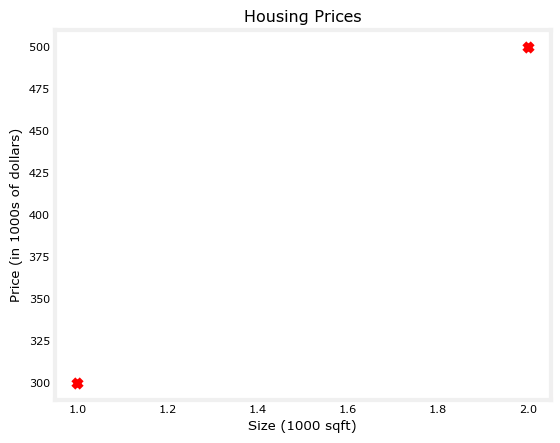

In [5]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')

# title
plt.title("Housing Prices")

# show labels
plt.ylabel('Price (in 1000s of dollars)')   # Set the y-axis label
plt.xlabel('Size (1000 sqft)')  # Set the x-axis label

plt.show()

<h3 style="color:#007fff"> <strong>Model function</strong> </h3>  

The model function for linear regression (which is a function that maps from `x` to `y`) is represented as 

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

This formula represent straight lines - different values of $w$ and $b$ makes different straight lines. 

<br>

For example following uses $w = 100$ and $b = 100$. 

In [6]:
w = 100
b = 100

print(f"w: {w}")
print(f"b: {b}")

w: 100
b: 100


Now we try to calculate $f_{w,b}(x^{(i)})$ for our two data points.

We can explicitly write this for each data point -  

* for $x^{(0)}$, `f_wb = w * x[0] + b`

* for $x^{(1)}$, `f_wb = w * x[1] + b`

For a large number of data points, we cannot hardcode like this, instead we're going to use a for loop.  
The loop is shown in the `compute_model_output` function below.  

#### 🎈 **Note**:  
* In argument description `(ndarray (m,))` means a Numpy n-dimensional array of shape (m,).  
* `(scalar)` means just a numerical value, without any dimensions, just a magnitude.  
* `np.zero(n)` will return a one-dimensional numpy array with $n$ entries   


In [7]:
def compute_model_output(x, w, b):
    """
    Computes the output/prediction of a linear model
        Args:
            x (ndarray (m,)): Data, m examples 
            w,b (scalar)    : model parameters  

        Returns
            y (ndarray (m,)): target values
    """
    
    # get the shape of the feature (input data)
    m = x.shape[0]

    # initialize f_wb with m zeros
    f_wb = np.zeros(m)
    
    # update f_wb
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

Plot the output from `compute_model_output` and compare

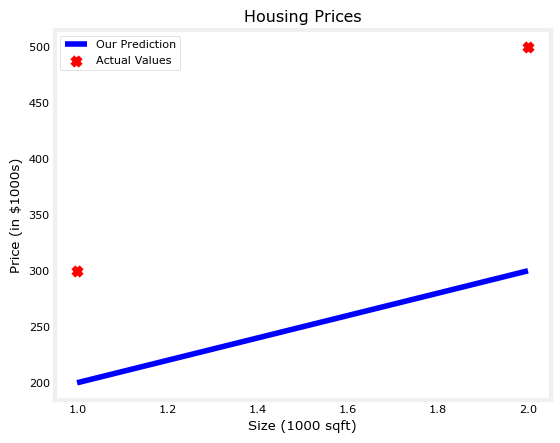

In [8]:
tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot the model prediction (the straight line)
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")

# Set the x-axis, y-axis label
plt.ylabel('Price (in $1000s)')
plt.xlabel('Size (1000 sqft)')

# show legends
plt.legend()
plt.show()

Notice, setting $w = 100$ and $b = 100$ does *not* give a line that fits the training data well.


<h3 style="color:#e52b52"> <strong>Challenge</strong> </h3>  

* Try adjusting the values of $w$ and $b$. 
* What values do you think would give a better fit to the data?


<h4 style="color:#ff6644"> <strong>Tip</strong> </h4>  

💡 Click on the triangle to the left of the **"Hints"** to reveal suggestions for choosing b and w.

<br>
<br>

<details>
<summary>
    <font size='5', color='#1bbc9f'><b>Hints</b></font>
</summary>
    <p>
    <ul>
        <li>Try $w = 200$ and $b = 100$ </li>
    </ul>
    </p>

In [11]:
w = 200
b = 100

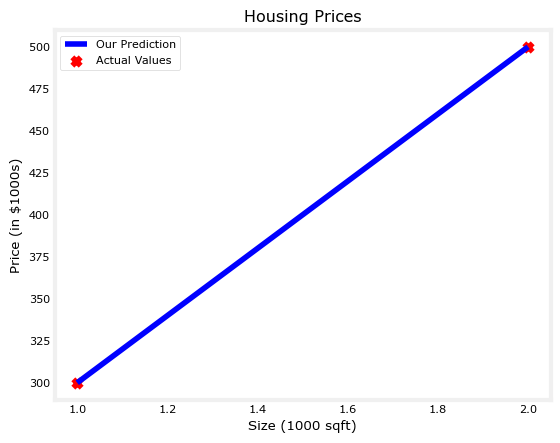

In [12]:
tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot the model prediction (the straight line)
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")

# Set the x-axis, y-axis label
plt.ylabel('Price (in $1000s)')
plt.xlabel('Size (1000 sqft)')

# show legends
plt.legend()
plt.show()

We can see now that the line now fits our data!


<h3 style="color:#8844dd"> <strong>Prediction</strong> </h3>  

Now that we build a model, let’s use it to make a prediction.  
For a house with **1200 sqft**, since $x$ is measured in thousands of sqft, we set $x = 1.2$.


In [ ]:
w = 200                         
b = 100    
x_i = 1.2
cost_1200sqft = w * x_i + b    

print(f"${cost_1200sqft:.0f} thousand dollars")

Waht we have learned:
 - Linear regression builds a model 
 - the model establishes a relationship between **features** and **targets**
     - in our example, the **feature** was `house size` and the **target** was `house price`
     - the model has two parameters $w$ and $b$ whose values are 'fit' using *training data*.
     - once a model's parameters have been determined, the model can be used to make predictions on new data.